In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

Para este ejercicio vamos a usar el dataset [MNIST dataset](http://yann.lecun.com/exdb/mnist/). Es un dataset clásico que consiste en 60000 imagenes de números (del 0 al 9) escritos a mano, y el objetivo es clasificar los números.

Scikit-learn tiene una función [load_digits](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) que se puede utilizar para cargar el dataset. Sin embargo, dicha función sólo tiene 1700 observaciones. Asi que lo que vamos a hacer es cargar la version completa del dataset que está almacenada en la carpeta data.

Para ello usaremos el paquete [pickle](https://docs.python.org/3/library/pickle.html) que es una forma de guardar objetos de python al disco duro y luego poder leerlos de nuevo.

In [2]:
import pickle

with open("./data/mnist.pkl", "rb") as fname:
    mnist = pickle.load(fname)

In [3]:
mnist_data = mnist["training_images"]
mnist_target = mnist["training_labels"]

In [4]:
mnist_data.shape

(60000, 784)

El dataset consiste de 60000 imagenes de números escritos a mano, cada uno es una imagen de tamaño 28x28 pixeles (altura x anchura) en escala de grises (0 siendo el negro absoluto y 255 siendo el blanco absoluto).

In [5]:
primer_digito = mnist_data[0]

In [6]:
primer_digito

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

Vemos que los digitos están en un solo array de tamaño `28 x 28 = 784`. Podemos mostrarlo con la función `plt.imshow` que muestra una imagen. Tenemos que cambiar la forma del array a (28,28).

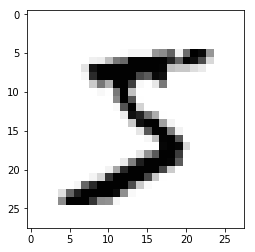

In [16]:
plt.imshow(primer_digito.reshape(28,28), cmap="Greys");

Para acelerar el ejercicio, vamos a tomar una muestra de 10000 observaciones. **Si en vuestro ordenador tarda mucho, siempre podeis reducir el tamaño mas**.

In [17]:
import numpy as np
sample_size = 10000
np.random.seed(42)
random_sample_index = np.random.randint(0, mnist_data.shape[0], sample_size)
random_sample_index

array([56422, 15795,   860, ...,  9484,  5495, 28481])

In [18]:
mnist_muestra_pixeles = mnist_data[random_sample_index]
mnist_muestra_clase = mnist_target[random_sample_index]

In [19]:
mnist_muestra_pixeles.shape

(10000, 784)

In [20]:
mnist_muestra_clase

array([4, 0, 0, ..., 2, 6, 9], dtype=uint8)

### Usa PCA para reducir la dimensionalidad del dataset (`mnist_muestra_pixeles`) y usa el nuevo dataset como datos de entrenamiento para un clasificador que clasifique correctamente las imagenes. El criterio de evaluacion tiene que ser el criterio F1. Hay varias formas de usar el criterio F1 para casos de multiclase (en este caso hay 10 clases, del número 0 al 9). leer la [documentación del criterio F1 puede ayudar.](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)). 